In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
# from scripts.data_processing import *

# Load the data

In [7]:
df = pd.read_csv('../data/dataset.txt', delimiter ='|')
df.head()

C:\Users\eldiy\AppData\Local\Temp\ipykernel_7776\2565061307.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dataset.txt', delimiter ='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# Properties of the Data

In [8]:
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [9]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [11]:
df.shape

(1000098, 52)

In [28]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'total_premium', 'total_claims'],
      dtype='object')

In [29]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

# Duplicate Values

In [12]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

# Convert data to CSV

In [13]:
df.to_csv('../data/dataset.csv', index = False)


# Descriptive Statistics

In [14]:
# Rename columns for clarity
df['total_premium'] = df['TotalPremium']
df['total_premium'].describe()

count    1.000098e+06
mean     6.190550e+01
std      2.302845e+02
min     -7.825768e+02
25%      0.000000e+00
50%      2.178333e+00
75%      2.192982e+01
max      6.528260e+04
Name: total_premium, dtype: float64

In [15]:
# Rename columns for clarity
df['total_claims'] = df['TotalClaims']
df['total_claims'].describe()

count    1.000098e+06
mean     6.486119e+01
std      2.384075e+03
min     -1.200241e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.930921e+05
Name: total_claims, dtype: float64

# Check Data Types

In [16]:
# Data Structure Review
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

# Check for Missing Values

In [17]:
# Data Quality Assessment
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'] != 0]
    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
    print(f"Your dataframe has {df.shape[1]} columns with {mis_val_table_ren_columns.shape[0]} having missing values.")
    return mis_val_table_ren_columns

print(missing_values_table(df))

Your dataframe has 54 columns with 22 having missing values.
                         Missing Values  % of Total Values
NumberOfVehiclesInFleet         1000098              100.0
CrossBorder                      999400               99.9
CustomValueEstimate              779642               78.0
WrittenOff                       641901               64.2
Converted                        641901               64.2
Rebuilt                          641901               64.2
NewVehicle                       153295               15.3
Bank                             145961               14.6
AccountType                       40232                4.0
Gender                             9536                1.0
MaritalStatus                      8259                0.8
mmcode                              552                0.1
VehicleType                         552                0.1
make                                552                0.1
VehicleIntroDate                    552               

# Variance

In [18]:
#variance
variance_premium = df['total_premium'].var()
variance_claims = df['total_claims'].var()

print(f"Variance of TotalPremium: {variance_premium}")
print(f"Variance of TotalClaims: {variance_claims}")

Variance of TotalPremium: 53030.956816024656
Variance of TotalClaims: 5683812.148962515


# Standard Deviation

In [19]:
#Standard deviation
std_dev_premium = df['total_premium'].std()
std_dev_claims = df['total_claims'].std()

range_premium = df['total_premium'].max() - df['total_premium'].min()
range_claims = df['total_claims'].max() - df['total_claims'].min()

print(f"Standard Deviation of TotalPremium: {std_dev_premium}")
print(f"Standard Deviation of TotalClaims: {std_dev_claims}")
print(f"Range of TotalPremium: {range_premium}")
print(f"Range of TotalClaims: {range_claims}")

Standard Deviation of TotalPremium: 230.28451275764218
Standard Deviation of TotalClaims: 2384.07469450152
Range of TotalPremium: 66065.18017543857
Range of TotalClaims: 405094.5175438598


# Univariate Analysis

# Plot histogram for numerical column

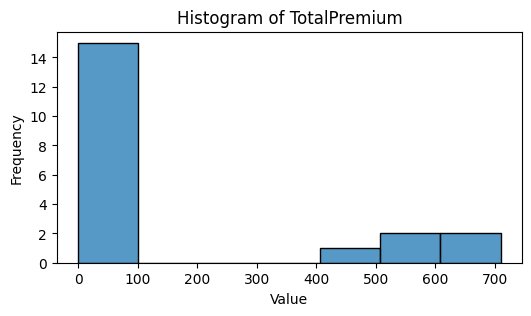

In [20]:
# Visualize the histogram for TotalPremium
df_sample = df.head(20)
numerical_column = 'TotalPremium'

plt.figure(figsize=(6, 3))
sns.histplot(df_sample[numerical_column])
plt.title(f'Histogram of {numerical_column}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart for categorical column

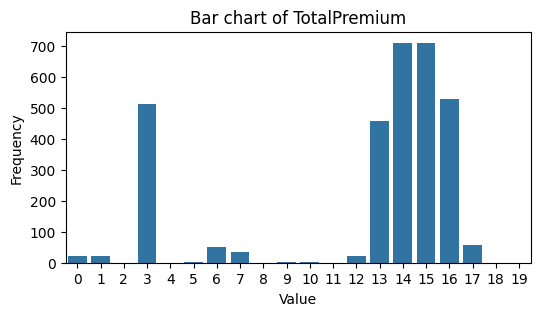

In [21]:
df_sample = df.head(20)
categorical_column = 'TotalPremium'

plt.figure(figsize=(6, 3))
sns.barplot(df_sample[categorical_column])
plt.title(f'Bar chart of {categorical_column}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

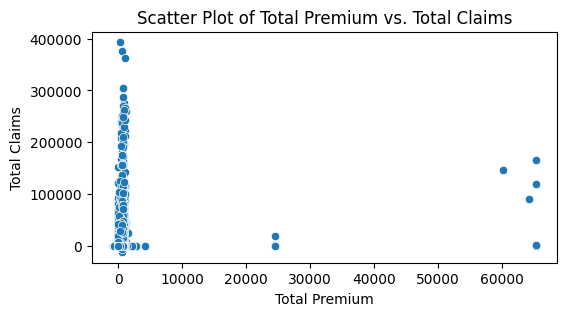

In [22]:
# Scatter Plot for TotalPremium vs TotalClaims
plt.figure(figsize=(6, 3))
sns.scatterplot(x='total_premium', y='total_claims', data=df)
plt.title('Scatter Plot of Total Premium vs. Total Claims')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.show()

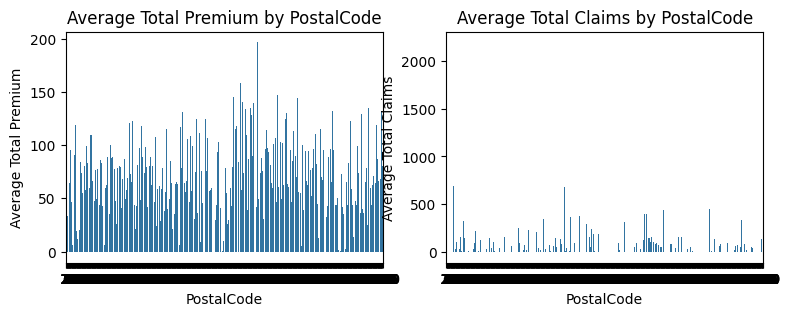

In [23]:
# Grouped Analysis by PostalCode
grouped_df = df.groupby('PostalCode')[['total_premium', 'total_claims']].mean().reset_index()

# Bar Plot for TotalPremium and TotalClaims by PostalCode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='PostalCode', y='total_premium', data=grouped_df)
plt.title('Average Total Premium by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Average Total Premium')


plt.subplot(1, 2, 2)
sns.barplot(x='PostalCode', y='total_claims', data=grouped_df)
plt.title('Average Total Claims by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Average Total Claims')


plt.show()

# Correlations

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(data, columns):
    """
    Plots a correlation heatmap for the given columns in the dataset.
    
    Parameters:
    - data: pandas DataFrame containing the dataset
    - columns: list of column names to compute correlation
    
    Returns:
    - A heatmap showing correlations between the specified columns.
    """
    # Compute correlation matrix
    correlation_matrix = data[columns].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))
    
    # Draw the heatmap with seaborn
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
    
    # Set the title and display the plot
    plt.title('Correlation Heatmap')
    plt.show()


C:\Users\eldiy\AppData\Local\Temp\ipykernel_7776\2100094474.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/dataset.csv')


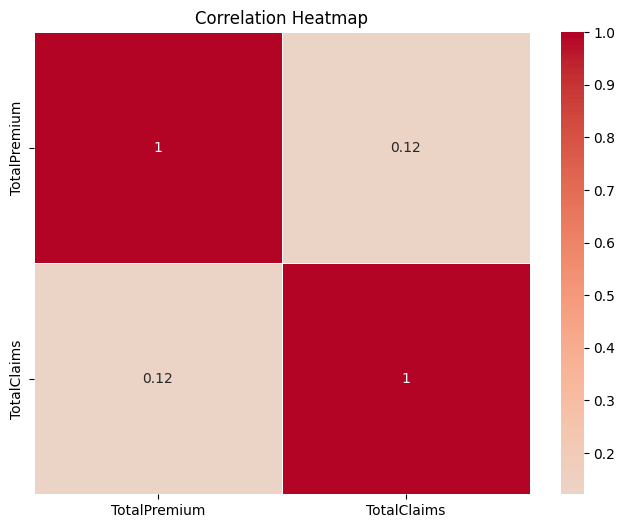

In [26]:
data = pd.read_csv('../data/dataset.csv')
plot_correlation_heatmap(data, ['TotalPremium', 'TotalClaims'])

# Correlation between numerical columns

C:\Users\eldiy\AppData\Local\Temp\ipykernel_7776\1576736775.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/dataset.csv')


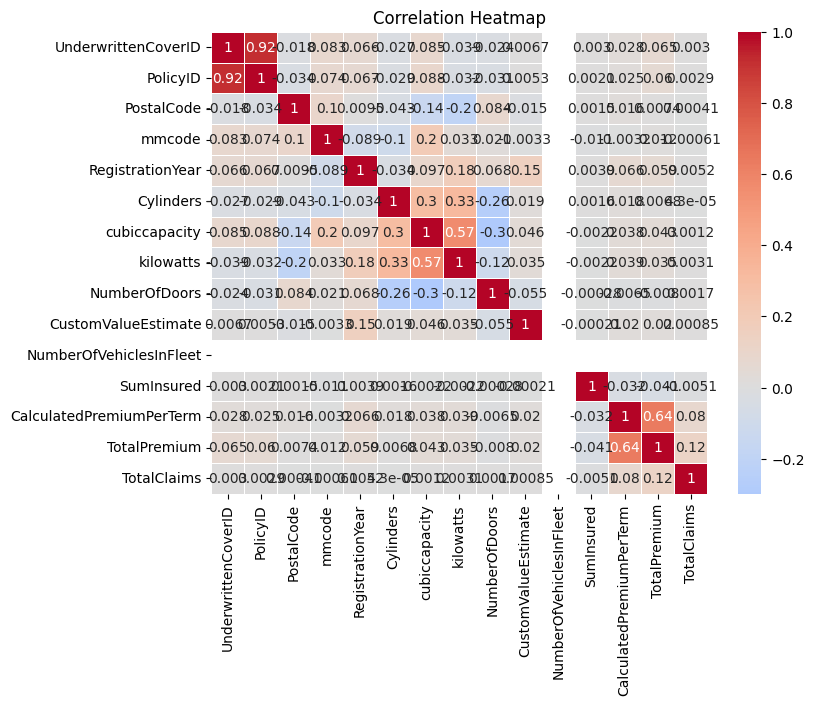

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/dataset.csv')

# Identify the numerical columns in the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the function to plot the correlation heatmap
def plot_correlation_heatmap(data, columns):
    correlation_matrix = data[columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Plot the correlation heatmap for the numerical columns
plot_correlation_heatmap(data, numerical_columns)

# Multivariate Analysis

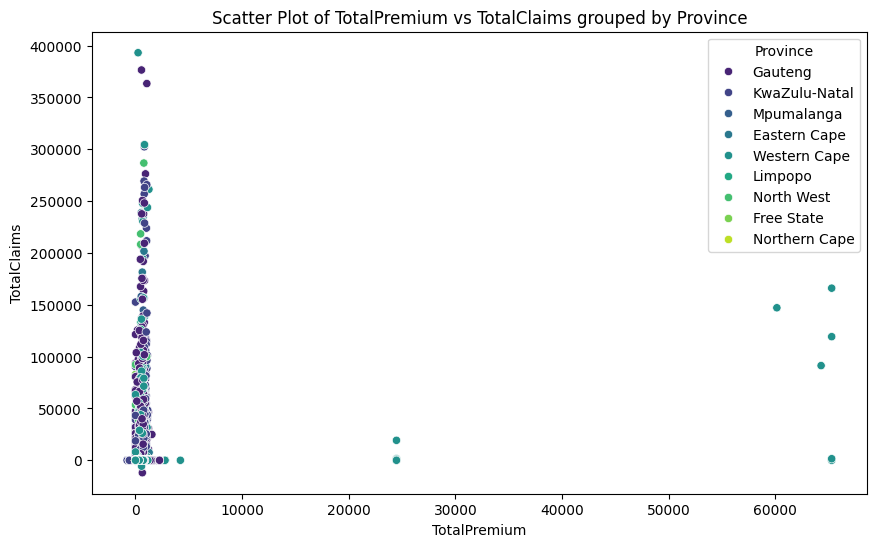

Correlation Matrix of TotalPremium vs TotalClaims by Province
Province
Eastern Cape     0.059646
Free State       0.054746
Gauteng          0.092761
KwaZulu-Natal    0.101787
Limpopo          0.053468
Mpumalanga       0.073857
North West       0.069032
Northern Cape    0.074800
Western Cape     0.203678
Name: TotalPremium, dtype: float64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data, x_column, y_column, hue_column):
    """
    Plots a scatter plot for the given data using Seaborn.
    
    Parameters:
    - data: The DataFrame containing the dataset
    - x_column: The name of the column for the x-axis (e.g., 'TotalPremium')
    - y_column: The name of the column for the y-axis (e.g., 'TotalClaims')
    - hue_column: The name of the column for coloring the points (e.g., 'Province')
    
    Returns:
    - A scatter plot showing the relationship between x_column and y_column, colored by hue_column.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=hue_column, data=data, palette='viridis')
    plt.title(f'Scatter Plot of {x_column} vs {y_column} grouped by {hue_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Now, call the function to plot the scatter plot
plot_scatter(data, 'TotalPremium', 'TotalClaims', 'Province')

# Correlation matrix
correlation_matrix_province = data.groupby('Province')[['TotalPremium', 'TotalClaims']].corr().unstack()['TotalClaims']['TotalPremium']

print("Correlation Matrix of TotalPremium vs TotalClaims by Province")
print(correlation_matrix_province)

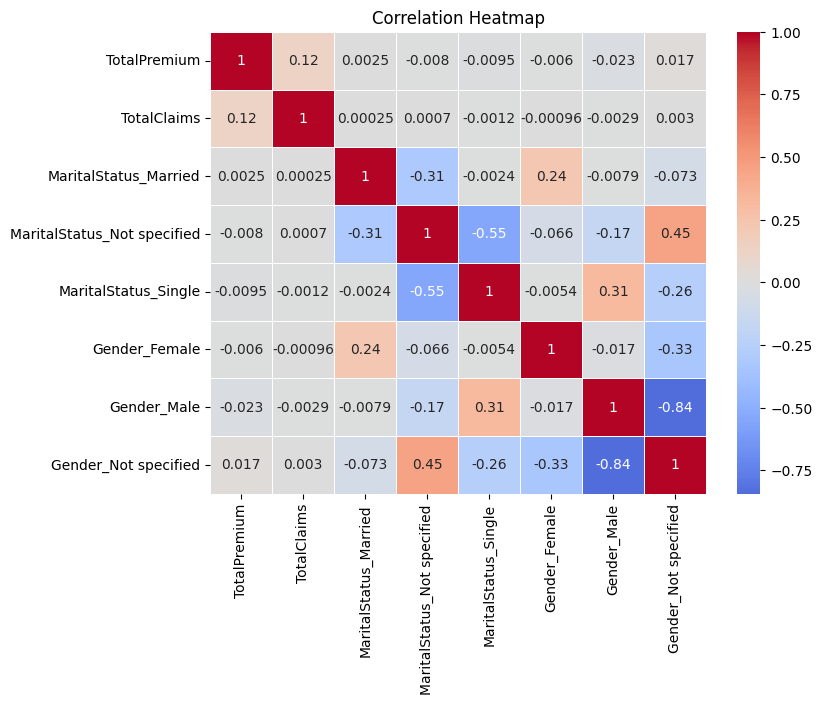

In [35]:
columns=['TotalPremium', 'TotalClaims', 'MaritalStatus', 'Gender']
columns_data = data[columns]

columns_data = pd.get_dummies(columns_data, columns=['MaritalStatus', 'Gender'])
plot_correlation_heatmap(columns_data, columns_data.columns)

# Comparison of Premium and Claims by Insurance Cover Type

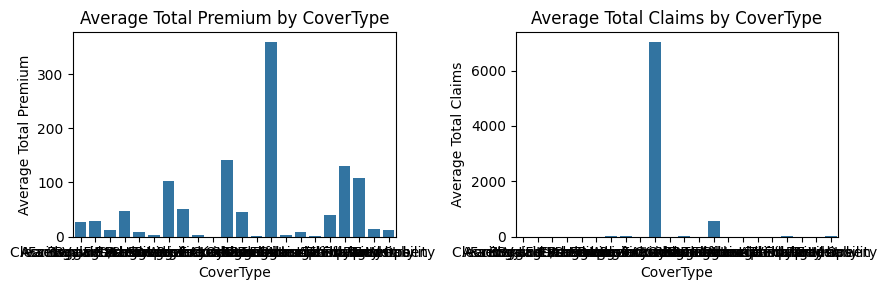

In [20]:
# Grouped Analysis by CoverType
grouped_cover_type_df = df.groupby('CoverType')[['total_premium', 'total_claims']].mean().reset_index()

# Bar Plot for TotalPremium and TotalClaims by CoverType
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
sns.barplot(x='CoverType', y='total_premium', data=grouped_cover_type_df)
plt.title('Average Total Premium by CoverType')
plt.xlabel('CoverType')
plt.ylabel('Average Total Premium')

plt.subplot(1, 2, 2)
sns.barplot(x='CoverType', y='total_claims', data=grouped_cover_type_df)
plt.title('Average Total Claims by CoverType')
plt.xlabel('CoverType')
plt.ylabel('Average Total Claims')

plt.tight_layout()
plt.show()

# Comparison of Premium and Claims by Auto Make

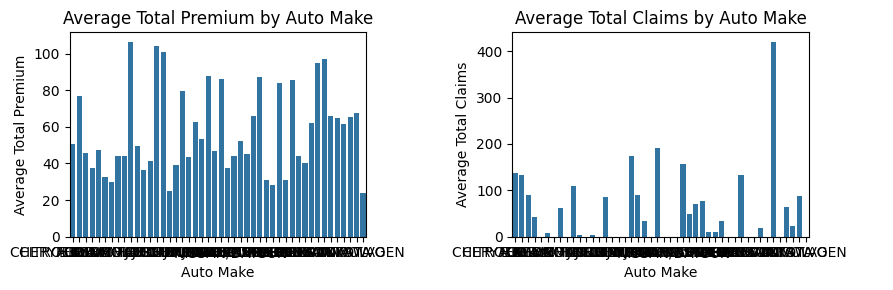

In [21]:
# Grouped Analysis by Auto Make
grouped_make_df = df.groupby('make')[['total_premium', 'total_claims']].mean().reset_index()

# Bar Plot for TotalPremium and TotalClaims by Make
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
sns.barplot(x='make', y='total_premium', data=grouped_make_df)
plt.title('Average Total Premium by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Average Total Premium')

plt.subplot(1, 2, 2)
sns.barplot(x='make', y='total_claims', data=grouped_make_df)
plt.title('Average Total Claims by Auto Make')
plt.xlabel('Auto Make')
plt.ylabel('Average Total Claims')

plt.tight_layout()
plt.show()

# TotalPremium and TotalClaims by PostalCode

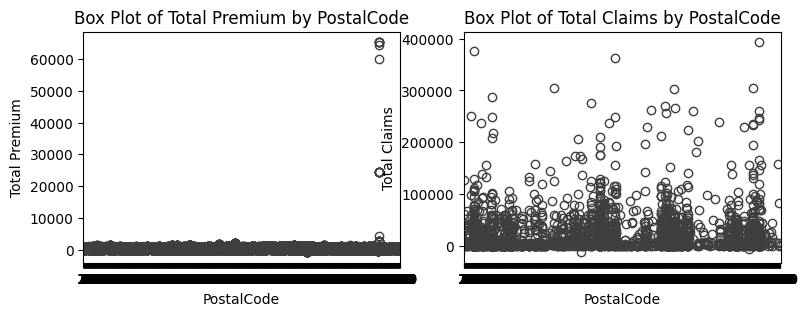

In [22]:
# Box Plot for TotalPremium and TotalClaims by PostalCode
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x='PostalCode', y='total_premium', data=df)
plt.title('Box Plot of Total Premium by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Total Premium')

plt.subplot(1, 2, 2)
sns.boxplot(x='PostalCode', y='total_claims', data=df)
plt.title('Box Plot of Total Claims by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Total Claims')

plt.show()

# Outlier Detection

        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
430                  119591      8672  2014-12-01 00:00:00            False   
431                  119591      8672  2015-03-01 00:00:00            False   
432                  119591      8672  2015-05-01 00:00:00            False   
433                  119591      8672  2015-07-01 00:00:00            False   
499                  129101     11030  2015-01-01 00:00:00            False   
...                     ...       ...                  ...              ...   
999233                20062      1095  2014-12-01 00:00:00            False   
999235                46257      4049  2015-02-01 00:00:00            False   
999592               167335     14399  2015-04-01 00:00:00            False   
999704               238583     20611  2015-05-01 00:00:00            False   
999705               238583     20611  2015-07-01 00:00:00            False   

       Citizenship          LegalType Title Languag

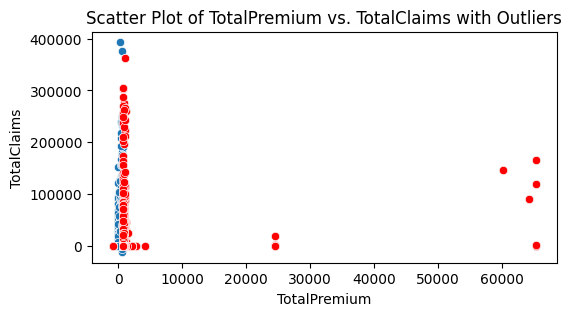

In [23]:
# Detect outliers using Z-score method
z_scores = np.abs((df['TotalPremium'] - df['TotalPremium'].mean()) / df['TotalPremium'].std())
outliers = df[z_scores > 3]

# Print outliers
print(outliers)

# Visualize outliers
plt.figure(figsize=(6, 3))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=outliers, color='red')
plt.title('Scatter Plot of TotalPremium vs. TotalClaims with Outliers')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.show()